In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("F:\Simple_projects\Akaike\Structured_Data_Assignment\sample_submission.csv")

In [3]:
dataset

,Patient-Uid,label
0,a0ff63ca-1c7c-11ec-8dde-16262ee38c7f,0
1,a0fc68ca-1c7c-11ec-90a6-16262ee38c7f,0
2,a0fe6b07-1c7c-11ec-aa06-16262ee38c7f,0
3,a0fc6634-1c7c-11ec-958a-16262ee38c7f,0
4,a1009e02-1c7c-11ec-a170-16262ee38c7f,1


In [4]:
train = pd.read_parquet("F:\\Simple_projects\\Akaike\\Structured_Data_Assignment\\train.parquet")

In [5]:
train.head(20)

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
9,a0dc9577-1c7c-11ec-8b4d-16262ee38c7f,2019-12-16,DRUG_TYPE_1
11,a0dc95c6-1c7c-11ec-8e77-16262ee38c7f,2020-02-07,DRUG_TYPE_1
12,a0dc95f9-1c7c-11ec-b968-16262ee38c7f,2019-08-01,DRUG_TYPE_1
14,a0dc962a-1c7c-11ec-8a51-16262ee38c7f,2017-06-20,DRUG_TYPE_1
16,a0dc9659-1c7c-11ec-a91e-16262ee38c7f,2015-11-25,DRUG_TYPE_2


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [7]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Incident'>

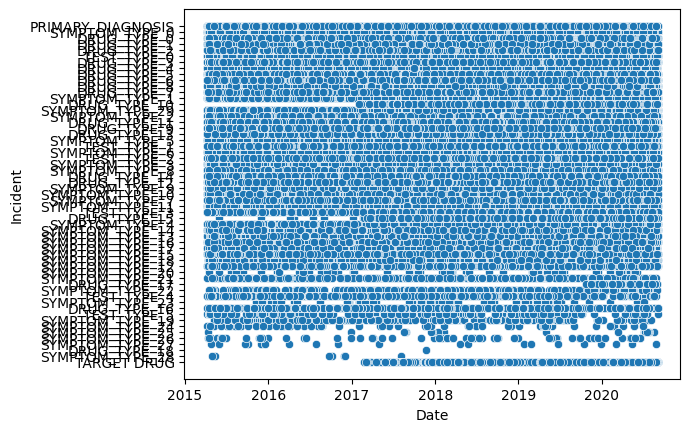

In [8]:
# sns.scatterplot(data = train, x = "Date", y ="Incident")

In [9]:
train["Incident"].unique()

array(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
   

In [10]:
train['Patient-Uid'] = train['Patient-Uid'].str.replace('-16262ee38c7f', '')

In [11]:
train['Patient-Uid'] = train['Patient-Uid'].str.replace('-1c7c-11ec', '')

In [12]:
train["Patient-Uid"].nunique()

27033

In [13]:
sort_train = train.sort_values(by = ["Patient-Uid","Date",]).reset_index(drop = True)

In [25]:
sort_train["Patient-Uid"].unique()

array(['a0db1e73-ae39', 'a0dc93f2-9cd2', 'a0dc94c6-a3a0', ...,
       'a0f0d523-89d2', 'a0f0d553-a70a', 'a0f0d582-a6c1'], dtype=object)

In [28]:
patient = sort_train[sort_train['Patient-Uid'] == 'a0dc94c6-a3a0']

In [29]:
patient

,Patient-Uid,Date,Incident
205,a0dc94c6-a3a0,2015-04-08,DRUG_TYPE_0
206,a0dc94c6-a3a0,2015-04-08,PRIMARY_DIAGNOSIS
207,a0dc94c6-a3a0,2015-04-08,DRUG_TYPE_7
208,a0dc94c6-a3a0,2015-04-08,DRUG_TYPE_1
209,a0dc94c6-a3a0,2015-04-08,PRIMARY_DIAGNOSIS
...,...,...,...
298,a0dc94c6-a3a0,2018-05-30,SYMPTOM_TYPE_6
299,a0dc94c6-a3a0,2018-10-24,DRUG_TYPE_0
300,a0dc94c6-a3a0,2018-10-24,PRIMARY_DIAGNOSIS
301,a0dc94c6-a3a0,2018-10-24,PRIMARY_DIAGNOSIS


In [17]:
target_drug_patient = sort_train[sort_train['Incident'] == 'TARGET DRUG']

In [18]:
target_drug_patient["Patient-Uid"].nunique()

9374

In [19]:
test = pd.read_parquet("test.parquet")

In [30]:
test['Patient-Uid'] = test['Patient-Uid'].str.replace('-1c7c-11ec', '')

In [31]:
test['Patient-Uid'] = test['Patient-Uid'].str.replace('-16262ee38c7f', '')

In [32]:
test

,Patient-Uid,Date,Incident
0,a0f9e8a9-8d25,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-8d25,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-8d25,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-8d25,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-8d25,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-b3ce,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-b3ce,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-b3ce,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-b3ce,2017-09-25,DRUG_TYPE_8


In [51]:
sort_test = test.sort_values(by = ["Patient-Uid","Date",]).reset_index(drop = True)

In [52]:
sort_test["Patient-Uid"].nunique()

11482

In [46]:
target_df_train = sort_train.copy()

In [47]:
target_df_train['Incident'] = target_df_train['Incident'].apply(lambda x: 1 if x == 'TARGET DRUG' else 0)

In [48]:
target_df_train

,Patient-Uid,Date,Incident
0,a0db1e73-ae39,2015-09-22,0
1,a0db1e73-ae39,2018-04-13,0
2,a0db1e73-ae39,2018-05-02,0
3,a0db1e73-ae39,2018-11-23,0
4,a0db1e73-ae39,2018-11-23,0
...,...,...,...
3220863,a0f0d582-a6c1,2020-06-19,0
3220864,a0f0d582-a6c1,2020-07-09,1
3220865,a0f0d582-a6c1,2020-07-10,0
3220866,a0f0d582-a6c1,2020-08-05,1


In [49]:
# extracting the new features from the date column
def create_feature(df):
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.isocalendar().week.astype("int64")
    return df

In [50]:
# applying new feature extraction function to the dataframe without outliers
fueature_df_train = target_df_train.copy()
fueature_df_train = create_feature(fueature_df_train)
fueature_df_train


,Patient-Uid,Date,Incident,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,a0db1e73-ae39,2015-09-22,0,1,3,9,2015,265,22,39
1,a0db1e73-ae39,2018-04-13,0,4,2,4,2018,103,13,15
2,a0db1e73-ae39,2018-05-02,0,2,2,5,2018,122,2,18
3,a0db1e73-ae39,2018-11-23,0,4,4,11,2018,327,23,47
4,a0db1e73-ae39,2018-11-23,0,4,4,11,2018,327,23,47
...,...,...,...,...,...,...,...,...,...,...
3220863,a0f0d582-a6c1,2020-06-19,0,4,2,6,2020,171,19,25
3220864,a0f0d582-a6c1,2020-07-09,1,3,3,7,2020,191,9,28
3220865,a0f0d582-a6c1,2020-07-10,0,4,3,7,2020,192,10,28
3220866,a0f0d582-a6c1,2020-08-05,1,2,3,8,2020,218,5,32


In [53]:
target_df_test = sort_test.copy()

In [54]:
target_df_test ['Incident'] = target_df_test['Incident'].apply(lambda x: 1 if x == 'TARGET DRUG' else 0)

In [56]:
target_df_test

,Patient-Uid,Date,Incident
0,a0f9e8a9-8d25,2016-06-23,0
1,a0f9e8a9-8d25,2016-12-08,0
2,a0f9e8a9-8d25,2016-12-08,0
3,a0f9e8a9-8d25,2016-12-08,0
4,a0f9e8a9-8d25,2016-12-08,0
...,...,...,...
1065519,a10272c9-b3ce,2019-03-06,0
1065520,a10272c9-b3ce,2019-03-06,0
1065521,a10272c9-b3ce,2019-03-06,0
1065522,a10272c9-b3ce,2019-03-06,0


In [57]:
# applying new feature extraction function to the dataframe without outliers
fueature_df_test = target_df_test.copy()
fueature_df_test = create_feature(fueature_df_test)
fueature_df_test

,Patient-Uid,Date,Incident,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,a0db1e73-ae39,2015-09-22,0,1,3,9,2015,265,22,39
1,a0db1e73-ae39,2018-04-13,0,4,2,4,2018,103,13,15
2,a0db1e73-ae39,2018-05-02,0,2,2,5,2018,122,2,18
3,a0db1e73-ae39,2018-11-23,0,4,4,11,2018,327,23,47
4,a0db1e73-ae39,2018-11-23,0,4,4,11,2018,327,23,47
...,...,...,...,...,...,...,...,...,...,...
3220863,a0f0d582-a6c1,2020-06-19,0,4,2,6,2020,171,19,25
3220864,a0f0d582-a6c1,2020-07-09,1,3,3,7,2020,191,9,28
3220865,a0f0d582-a6c1,2020-07-10,0,4,3,7,2020,192,10,28
3220866,a0f0d582-a6c1,2020-08-05,1,2,3,8,2020,218,5,32


In [58]:
train_df = fueature_df_train
test_df = fueature_df_test

In [60]:
FEATURES = ['dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','Patient-Uid']
TARGET = 'Incident'

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test = test_df[FEATURES]
y_test = test_df[TARGET]

In [61]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'